In [1]:
from setup import setup_and_fetch_variables
environment_variables = setup_and_fetch_variables()
folder_paths = environment_variables.get('folder_paths', [])

In [5]:
import glob
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
import importlib
import get_datetime
importlib.reload(get_datetime)
from get_datetime import (
    # get_media_metadata, 
    plot_counts, extract_datetime_from_mp4
)

import data
importlib.reload(data)
from data import get_media_metadata

In [70]:
file_paths = glob.glob(os.path.join(folder_paths[0], "*"))
df = get_media_metadata(file_paths)
df.to_csv("output/media_datetime_v3.csv", index=False)

[JPG] No EXIF date found for E:\PICTURES\2025.01 GEXP\20250321_175430.jpg
[JPG] Falling back to mod time for E:\PICTURES\2025.01 GEXP\20250321_175430.jpg
[JPG] No EXIF date found for E:\PICTURES\2025.01 GEXP\20250321_175503.jpg
[JPG] Falling back to mod time for E:\PICTURES\2025.01 GEXP\20250321_175503.jpg
[JPG] No EXIF date found for E:\PICTURES\2025.01 GEXP\20250321_181927.jpg
[JPG] Falling back to mod time for E:\PICTURES\2025.01 GEXP\20250321_181927.jpg
[JPG] No EXIF date found for E:\PICTURES\2025.01 GEXP\20250321_181944.jpg
[JPG] Falling back to mod time for E:\PICTURES\2025.01 GEXP\20250321_181944.jpg
[JPG] No EXIF date found for E:\PICTURES\2025.01 GEXP\20250321_182011.jpg
[JPG] Falling back to mod time for E:\PICTURES\2025.01 GEXP\20250321_182011.jpg
[SKIP] No datetime found for E:\PICTURES\2025.01 GEXP\20250404_225625.mp4


In [71]:
df

,datetime,type,filename,latitude,longitude,altitude,color_1,color_2,color_3
0,2024-08-01 21:30:23,photo,20240801_213023.jpg,NaN,NaN,NaN,"(55, 52, 52)","(160, 161, 162)","(125, 124, 123)"
1,2024-08-01 21:30:31,photo,20240801_213030.jpg,NaN,NaN,NaN,"(118, 114, 112)","(156, 155, 156)","(47, 45, 45)"
2,2024-12-29 13:53:30,video,20241229_205305.mp4,NaN,NaN,NaN,"(None, None, None)","(None, None, None)","(None, None, None)"
3,2024-12-29 13:54:03,video,20241229_205358.mp4,NaN,NaN,NaN,"(None, None, None)","(None, None, None)","(None, None, None)"
4,2024-12-29 13:54:15,video,20241229_205411.mp4,NaN,NaN,NaN,"(None, None, None)","(None, None, None)","(None, None, None)"
...,...,...,...,...,...,...,...,...,...
7150,2025-06-30 16:37:59,photo,20250630_163759.jpg,1.341399,103.963922,42.0,"(132, 135, 112)","(165, 189, 229)","(54, 54, 45)"
7151,2025-06-30 16:41:12,photo,20250630_164111.jpg,1.342321,103.963634,43.0,"(73, 81, 56)","(141, 179, 225)","(147, 139, 122)"
7152,2025-06-30 18:12:12,photo,20250630_181212.jpg,1.335064,103.963748,21.0,"(181, 176, 170)","(19, 17, 15)","(104, 94, 87)"
7153,2025-07-03 19:55:18,photo,20250703_195517.jpg,1.342742,103.964361,22.0,"(111, 101, 87)","(23, 21, 21)","(196, 177, 149)"


In [82]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent="color-diary")
reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)

def get_city(lat, lon):
    if pd.isna(lat) or pd.isna(lon):
        return None
    try:
        location = reverse((lat, lon), language='en')
        if location and "address" in location.raw:
            addr = location.raw["address"]
            return addr.get("city") or addr.get("town") or addr.get("village") or addr.get("state")
    except Exception as e:
        print(f"Reverse geocoding failed for ({lat}, {lon}): {e}")
    return None

df['city'] = df.apply(lambda row: get_city(row['latitude'], row['longitude']) if row['type'] == 'photo' else None, axis=1)

RateLimiter caught an error, retrying (0/2 tries). Called with (*((1.3426314997222222, 103.96428939972222),), **{'language': 'en'}).
Traceback (most recent call last):
  File "c:\PYTHON CODES\Picture Mapping\venv\Lib\site-packages\urllib3\connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\PYTHON CODES\Picture Mapping\venv\Lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    raise err
  File "c:\PYTHON CODES\Picture Mapping\venv\Lib\site-packages\urllib3\util\connection.py", line 73, in create_connection
    sock.connect(sa)
TimeoutError: timed out

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\PYTHON CODES\Picture Mapping\venv\Lib\site-packages\urllib3\connectionpool.py", line 787, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "c:\PYTHON CODES\Picture Mapping\venv\Lib\

In [92]:
df

,datetime,type,filename,latitude,longitude,altitude,color_1,color_2,color_3,city
0,2024-08-01 21:30:23,photo,20240801_213023.jpg,NaN,NaN,NaN,"(55, 52, 52)","(160, 161, 162)","(125, 124, 123)",None
1,2024-08-01 21:30:31,photo,20240801_213030.jpg,NaN,NaN,NaN,"(118, 114, 112)","(156, 155, 156)","(47, 45, 45)",None
2,2024-12-29 13:53:30,video,20241229_205305.mp4,NaN,NaN,NaN,"(None, None, None)","(None, None, None)","(None, None, None)",None
3,2024-12-29 13:54:03,video,20241229_205358.mp4,NaN,NaN,NaN,"(None, None, None)","(None, None, None)","(None, None, None)",None
4,2024-12-29 13:54:15,video,20241229_205411.mp4,NaN,NaN,NaN,"(None, None, None)","(None, None, None)","(None, None, None)",None
...,...,...,...,...,...,...,...,...,...,...
7150,2025-06-30 16:37:59,photo,20250630_163759.jpg,1.341399,103.963922,42.0,"(132, 135, 112)","(165, 189, 229)","(54, 54, 45)",Singapore
7151,2025-06-30 16:41:12,photo,20250630_164111.jpg,1.342321,103.963634,43.0,"(73, 81, 56)","(141, 179, 225)","(147, 139, 122)",Singapore
7152,2025-06-30 18:12:12,photo,20250630_181212.jpg,1.335064,103.963748,21.0,"(181, 176, 170)","(19, 17, 15)","(104, 94, 87)",Singapore
7153,2025-07-03 19:55:18,photo,20250703_195517.jpg,1.342742,103.964361,22.0,"(111, 101, 87)","(23, 21, 21)","(196, 177, 149)",Singapore


In [67]:
df.isna().sum()

datetime        0
type            0
filename        0
latitude      295
longitude     295
altitude     1729
dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7155 entries, 0 to 7154
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  7155 non-null   datetime64[ns]
 1   type      7155 non-null   object        
 2   filename  7155 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 167.8+ KB


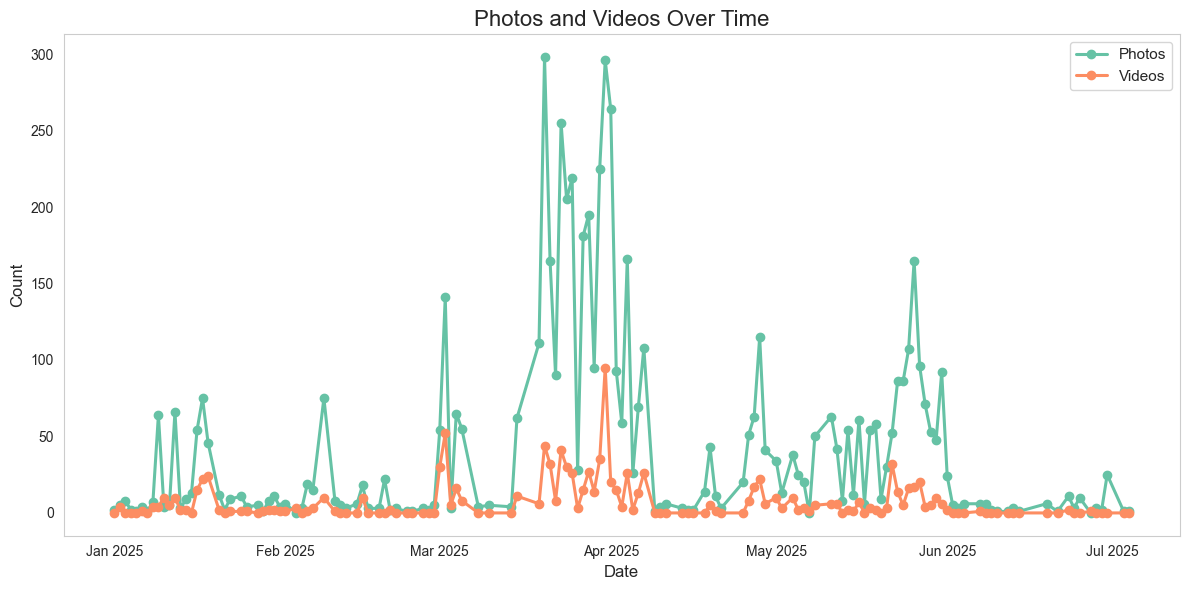

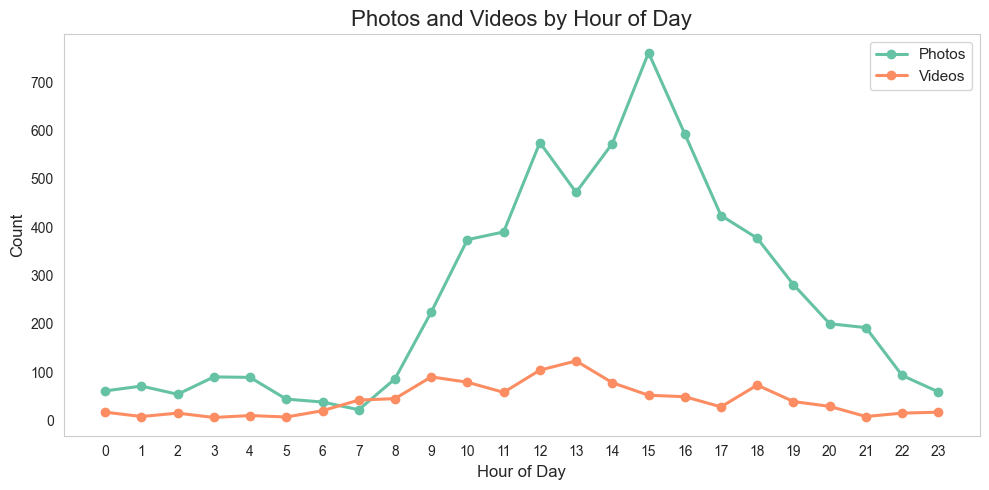

In [61]:
plot_counts(df)

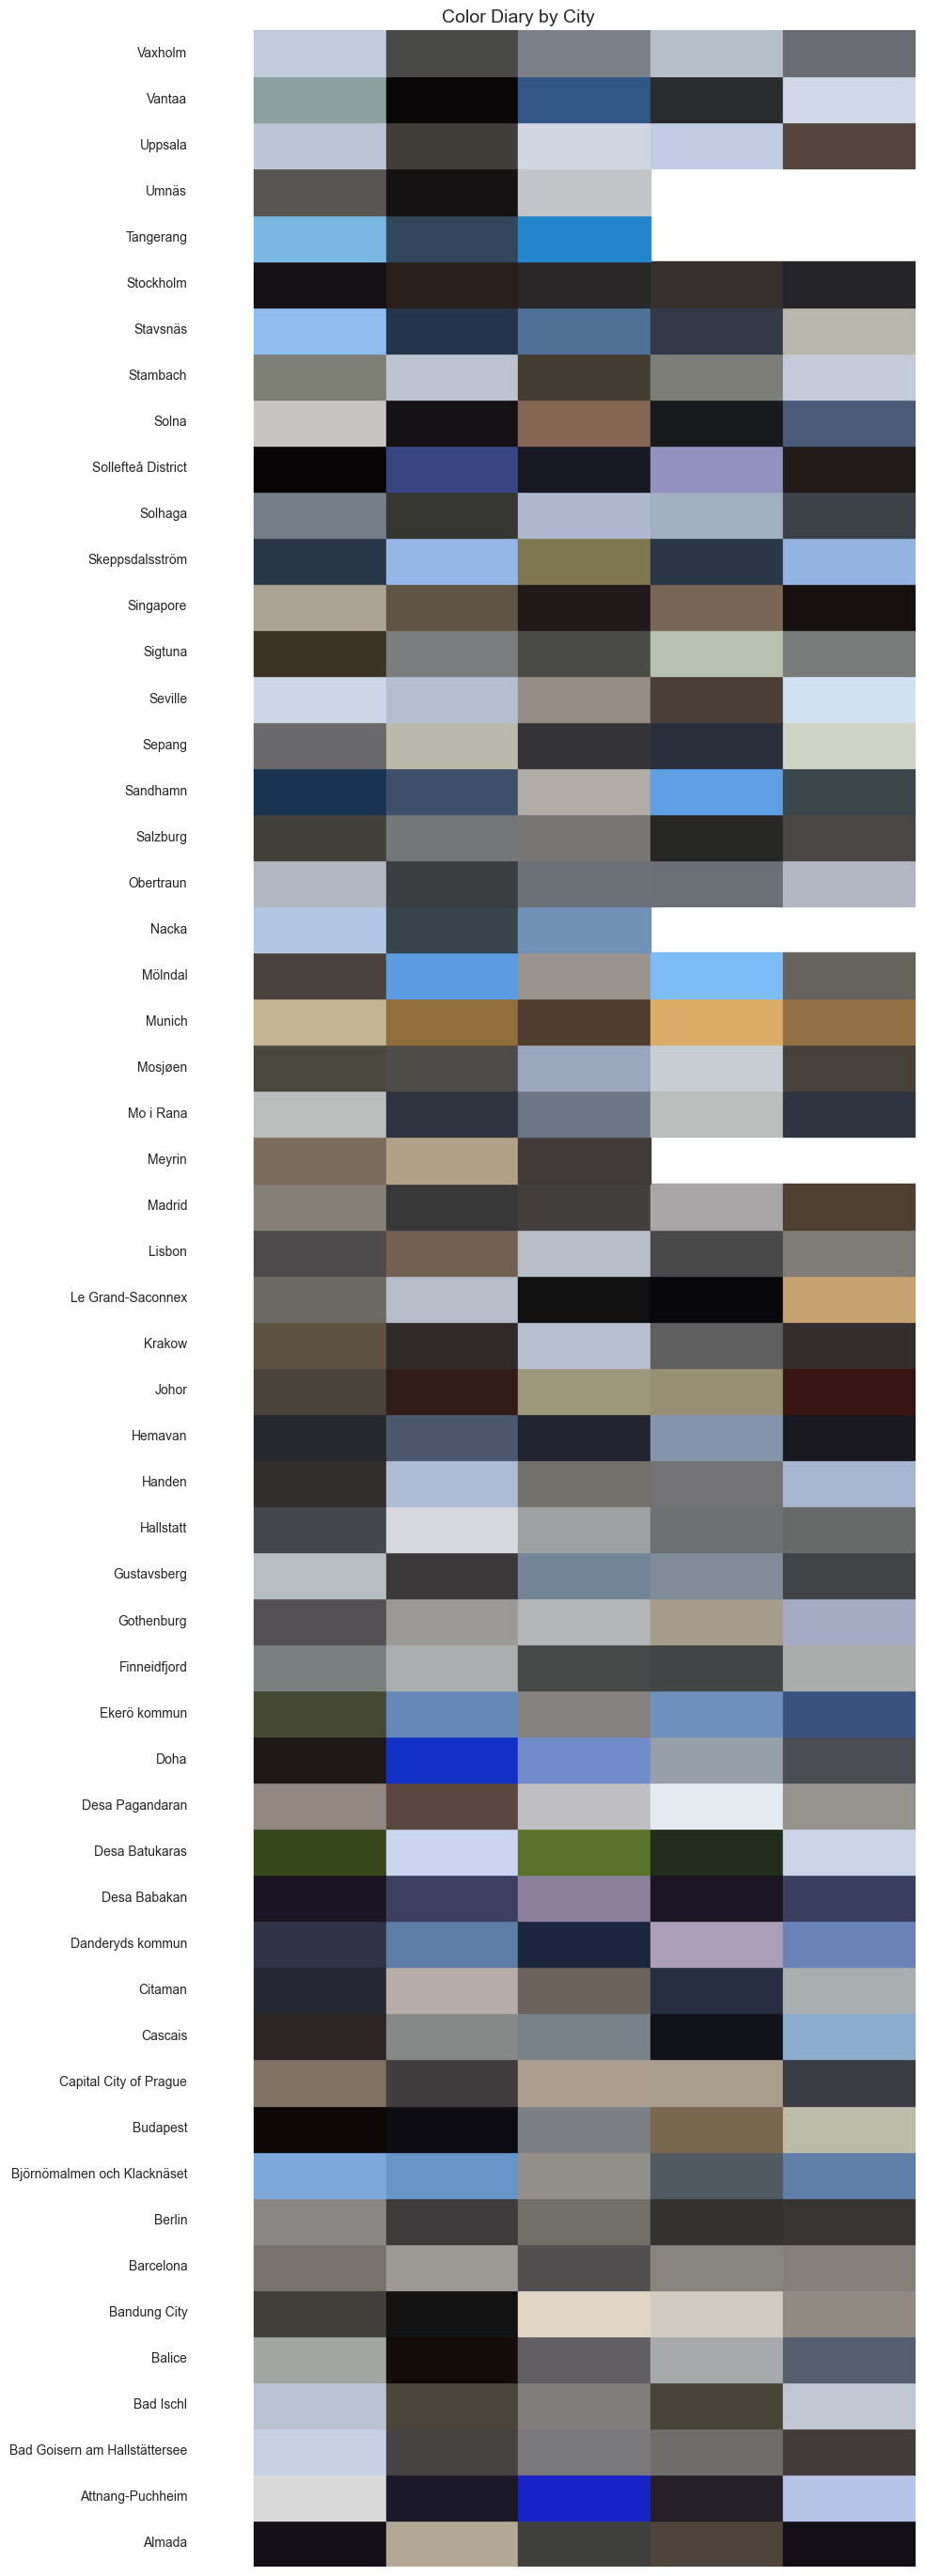

In [93]:
from collections import Counter

def average_rgb(colors):
    colors = [c for c in colors if c and None not in c]
    if not colors:
        return None
    avg = tuple(int(sum(x) / len(x)) for x in zip(*colors))
    return avg

def aggregate_city_colors(df, k=5):
    photo_df = df[df['type'] == 'photo'].copy()
    photo_df = photo_df.dropna(subset=['city', 'color_1', 'color_2', 'color_3'])
    
    # Combine all colors per city
    city_color_data = {}
    for city, group in photo_df.groupby('city'):
        colors = []
        for _, row in group.iterrows():
            for key in ['color_1', 'color_2', 'color_3']:
                if row[key] and None not in row[key]:
                    colors.append(row[key])
        # Use most common or average color clusters
        if not colors:
            continue
        counter = Counter(colors)
        top_colors = [color for color, _ in counter.most_common(k)]
        city_color_data[city] = top_colors
    
    return city_color_data

def plot_color_diary(city_color_data):
    import matplotlib.pyplot as plt

    cities = list(city_color_data.keys())
    n_cities = len(cities)
    
    fig, ax = plt.subplots(figsize=(10, n_cities * 0.5))
    ax.axis('off')

    for i, city in enumerate(cities):
        colors = city_color_data[city]
        for j, color in enumerate(colors):
            rect = plt.Rectangle((j, i), 1, 1, color=[c/255 for c in color])
            ax.add_patch(rect)
        ax.text(-0.5, i + 0.5, city, va='center', ha='right', fontsize=10)

    ax.set_xlim(-1, max(len(colors) for colors in city_color_data.values()))
    ax.set_ylim(0, n_cities)
    plt.title("Color Diary by City", fontsize=14)
    plt.tight_layout()
    plt.show()


city_color_data = aggregate_city_colors(df)
plot_color_diary(city_color_data)
